Enter number of processes for SJF: 4
Enter process ID for process 1: 1
Enter CPU burst time for process 1: 10
Enter process ID for process 2: 2
Enter CPU burst time for process 2: 20
Enter process ID for process 3: 3
Enter CPU burst time for process 3: 4
Enter process ID for process 4: 4
Enter CPU burst time for process 4: 8
SJF Average Waiting Time: 9.5
SJF Average Turnaround Time: 20.0


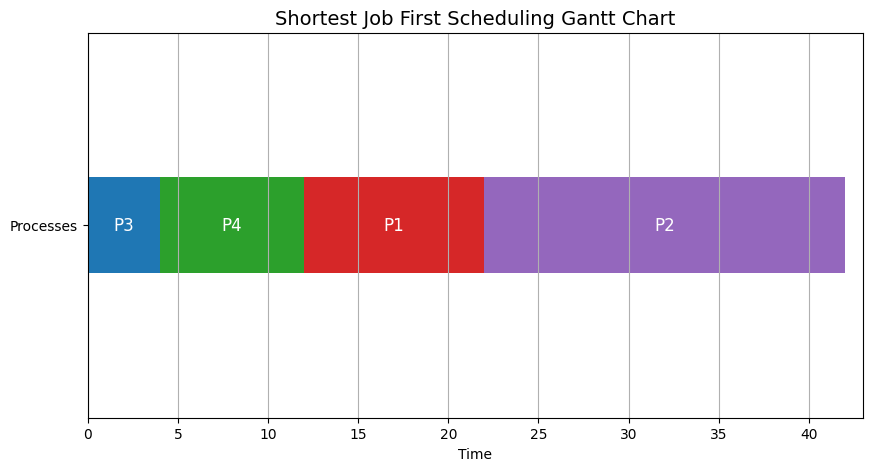

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to calculate the average waiting time and turnaround time for SJF
def sjf_scheduling(processes):
    n = len(processes)
    processes.sort(key=lambda x: x[1])  # Sort by burst time

    wait_time = [0] * n
    turnaround_time = [0] * n
    start_time = [0] * n
    current_time = 0
    gantt_chart = []

    # Calculate waiting time and turnaround time
    for i in range(n):
        pid, burst_time = processes[i]
        wait_time[i] = current_time
        turnaround_time[i] = current_time + burst_time
        start_time[i] = current_time
        current_time += burst_time
        gantt_chart.append((pid, start_time[i], current_time))

    avg_wait_time = sum(wait_time) / n
    avg_turnaround_time = sum(turnaround_time) / n

    print(f"SJF Average Waiting Time: {avg_wait_time}")
    print(f"SJF Average Turnaround Time: {avg_turnaround_time}")

    return gantt_chart

# Function to display the Gantt Chart with improved visualization
def display_gantt_chart(gantt_chart, title):
    fig, gnt = plt.subplots(figsize=(10, 5))

    gnt.set_ylim(0, 2)
    gnt.set_xlim(0, max([end for _, _, end in gantt_chart]) + 1)
    gnt.set_xlabel('Time')
    gnt.set_yticks([1])
    gnt.set_yticklabels(['Processes'])
    gnt.grid(True, axis='x')

    colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange']

    for i, process in enumerate(gantt_chart):
        pid, start, end = process
        gnt.broken_barh([(start, end - start)], (0.75, 0.5), facecolors=(colors[i % len(colors)]))
        gnt.text((start + end) / 2, 1, f"P{pid}", ha='center', va='center', fontsize=12, color='white')

    plt.title(title, fontsize=14)
    plt.show()

# Taking input from the user
n = int(input("Enter number of processes for SJF: "))
processes = []
for i in range(n):
    pid = int(input(f"Enter process ID for process {i + 1}: "))
    burst_time = int(input(f"Enter CPU burst time for process {pid}: "))
    processes.append((pid, burst_time))

gantt_chart_sjf = sjf_scheduling(processes)
display_gantt_chart(gantt_chart_sjf, "Shortest Job First Scheduling Gantt Chart")

Enter number of processes for RR: 4
Enter quantum time: 4
Enter process ID for process 1: 1
Enter CPU burst time for process 1: 10
Enter process ID for process 2: 2
Enter CPU burst time for process 2: 20
Enter process ID for process 3: 3
Enter CPU burst time for process 3: 4
Enter process ID for process 4: 4
Enter CPU burst time for process 4: 8
RR Average Waiting Time: 17.5
RR Average Turnaround Time: 28.0


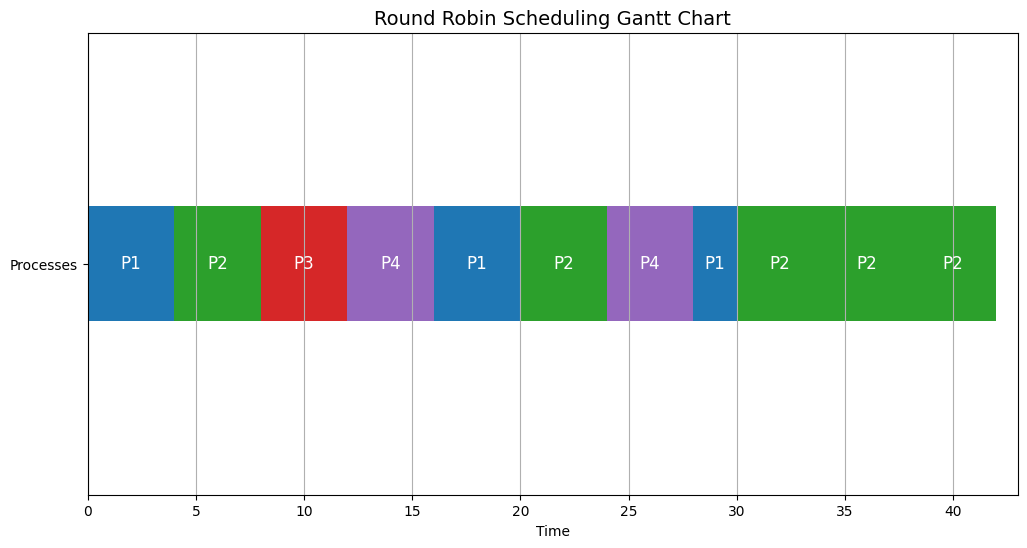

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to calculate the average waiting time and turnaround time for RR
def rr_scheduling(processes, quantum):
    n = len(processes)
    wait_time = [0] * n
    turnaround_time = [0] * n
    remaining_time = [burst_time for _, burst_time in processes]
    current_time = 0
    gantt_chart = []
    process_queue = []

    while any(remaining_time):
        for i in range(n):
            if remaining_time[i] > 0:
                pid, burst_time = processes[i]
                start_time = current_time
                execution_time = min(quantum, remaining_time[i])
                current_time += execution_time
                remaining_time[i] -= execution_time
                gantt_chart.append((pid, start_time, current_time))

                if remaining_time[i] == 0:
                    turnaround_time[i] = current_time
                    wait_time[i] = turnaround_time[i] - burst_time

    avg_wait_time = sum(wait_time) / n
    avg_turnaround_time = sum(turnaround_time) / n

    print(f"RR Average Waiting Time: {avg_wait_time}")
    print(f"RR Average Turnaround Time: {avg_turnaround_time}")

    return gantt_chart

# Function to display the Gantt Chart with distinct colors per process
def display_rr_gantt_chart(gantt_chart, title):
    fig, gnt = plt.subplots(figsize=(12, 6))

    gnt.set_ylim(0, 2)
    gnt.set_xlim(0, max([end for _, _, end in gantt_chart]) + 1)
    gnt.set_xlabel('Time')
    gnt.set_yticks([1])
    gnt.set_yticklabels(['Processes'])
    gnt.grid(True, axis='x')

    # Create a color map for each process
    color_map = {
        'P1': 'tab:blue',
        'P2': 'tab:green',
        'P3': 'tab:red',
        'P4': 'tab:purple',
        'P5': 'tab:orange'
    }

    # Adding the Gantt chart bars
    for process in gantt_chart:
        pid, start, end = process
        gnt.broken_barh([(start, end - start)], (0.75, 0.5), facecolors=(color_map[f'P{pid}']))
        gnt.text((start + end) / 2, 1, f"P{pid}", ha='center', va='center', fontsize=12, color='white')

    plt.title(title, fontsize=14)
    plt.show()

# Taking input from the user for RR scheduling
n_rr = int(input("Enter number of processes for RR: "))
quantum = int(input("Enter quantum time: "))
processes_rr = []
for i in range(n_rr):
    pid = int(input(f"Enter process ID for process {i + 1}: "))
    burst_time = int(input(f"Enter CPU burst time for process {pid}: "))
    processes_rr.append((pid, burst_time))

gantt_chart_rr = rr_scheduling(processes_rr, quantum)
display_rr_gantt_chart(gantt_chart_rr, "Round Robin Scheduling Gantt Chart")